# The Logistic problem

The *Logistic* equation is used as a model to describe the evolution of a population over a given time interval. Its form is of the type

$$x_{n+1} = kx_n(1-x_n)$$

where $k$ is a constant and $x_n$ is the population at the *generation* $n$, so that the popolation at the next generation is $x_{n+1}$ (the popolation is *normalized* to 1) 

Such equation can be formulated starting from a differential equation such that

$$x_{t+\Delta t} = kx_t(1-x_t) \ \rightarrow \ x_{t+\Delta_t} - x_t = \Delta x = kx_t(1-x_t)-x_t = x_t(k-1) - kx_{t}^{2}$$ 

Such $\Delta x$ corresponds to a specific $\Delta t$ that can be set to 1, so that 

$$\Delta x = [x_t(k-1) - kx_{t}^{2}]\Delta t \ \longrightarrow \ \dfrac{dx}{dt} =x_t(k-1) - kx_{t}^{2}$$

First, this equation will be analitically solved by using *sympy*: the symbolic library of Python. In a later section, we will employ a numerical method to find solutions for $\Delta t$ *not* reducible to an infinitesimal value.  

In [1]:
import sympy as sym
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import display

sym.init_printing(use_latex=True) 

Set a value of the $k$ constant, and an initial value for $x$ ($x(0)$)

In [2]:
k_val=2.8
x_ini=0.1

Define $k, t$ and $x_0$ as *sympy* symbols that will be associated to *real* and *positive* variables; also, declare $x$ to be a function of $t$:   

In [3]:
k, t, x0 = sym.symbols('k t x0', real=True, positive=True)
x = sym.Function('x')(t)

Define *xp* as the derivative of *x* with respect to *t*, and write down the differential equation *eq* as

$$\dfrac{dx}{dt}+kx^2 - (k-1)x = 0$$

Note that only the left hand side of the equation is needed.

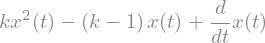

In [4]:
xp=x.diff(t)
eq=xp+k*x**2-(k-1)*x
display(eq)

Define the *logistic* function that will take *k_val* and *x_ini* as parameters, and will return the solution of the differental equation: the *right hand side* of the solution $x(t) =\ $*eq*, subjected to the initial condition (*ics*) $x(0) = x0$. The solution is saved in the symbol *x_tp*:  

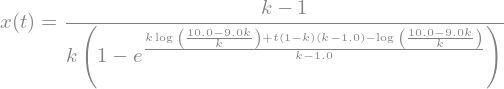

In [5]:
def logistic(x0, kv):
    par={k: kv}
    x_t=sym.dsolve(eq, x, ics={x.subs(t, 0): x0})
    display(x_t.simplify())
    x_tp=x_t.rhs.subs(par)
    return x_tp

x_tp=logistic(x_ini, k_val)

Such symbolic function is *transformed* in a *numpy* function (in the function below):

In [6]:
def plot_analytic():
   x_tl=sym.lambdify(t, x_tp, 'numpy')
   t_list=np.linspace(0., 10, 100)
   x_list=x_tl(t_list).real

   plt.figure(figsize=(4,3))
   plt.plot(t_list, x_list)
   plt.ylim(0., 1.)
   plt.xlim(0., 6.)
   plt.xlabel("time")
   plt.ylabel("Population")
   plt.show() 

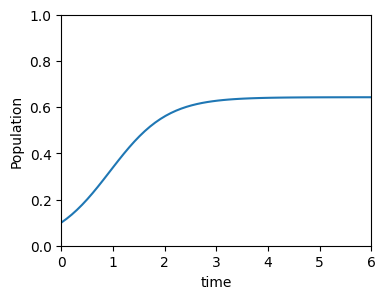

In [7]:
plot_analytic()

Below, we compute the limit value of $x(t)$ for $x\rightarrow\infty$, that is:  $$\lim_{t\rightarrow\infty} x(t)$$

In [8]:
x_limit=x_tp.limit(t, sym.oo).evalf()
print("Limit value for x: %6.4f" % x_limit)

Limit value for x: 0.6429


## Numerical computation

For $\Delta t = 1$

Do study in detail the class below which implements the numerical computation of the logistic problem. Depending on the value of $k$, the numerical solution does agree with the analitycal one (low values of $k$) or significantly diverges, by showing an *oscillating* behaviour. 

In [9]:
class Logistic():
      def __init__(self):
          self.x0=0.1
          self.k=2.5
          self.niter=5000
          self.last=100
          self.digits=5
          self.x_last=[]
          self.sx=None
          
      def logistic_function(self):
          
          x=self.x0
          
          for _ in range(self.niter):
              ix=self.k*x*(1-x)
              x=ix   
              ix=round(ix, self.digits)
                            
              yield ix             
             
      def count(self):
          
          x_list_generator=self.logistic_function()
          
          for _ in range(self.niter-self.last):
              next(x_list_generator)
              
          self.x_last=[]    
          for ix in range(self.last):
              xl=next(x_list_generator)
              self.x_last.append(xl)
              
          sx=set(self.x_last)
          self.sx=sx
          
      def get_stable_points_set(self, k):
          self.set_k(k)
          self.count()
          
          return self.sx    
          
      def set_k(self,k):
          self.k=k 
          
      def get_k(self):
          return self.k
          
      def set_param(self, xini=0.1, niter=5000, last=100, digits=5):
          self.x0=xini
          self.niter=niter
          self.last=last
          self.digits=digits
          
      def get_niter(self):
          return self.niter
          
      def plot(self, k=2.5, niter=30, hist=False, ret=False):
          
          k_orig=self.get_k()
          niter_orig=self.get_niter()
          
          self.set_param(niter=niter)
          self.set_k(k)
          
          x_list_generator=self.logistic_function()
          x_list=list(x_list_generator)
          
          self.set_param(niter=niter_orig)
          self.k=k_orig
          
          it_list=list(range(niter))
          plt.figure(figsize=(4,3))
          if not hist:
             plt.plot(it_list, x_list)
             plt.xlim(0)
             plt.ylim(0,1)
             plt.xlabel("Generation")
             plt.ylabel("X_i")
          else:
             plt.hist(x_list, bins=20) 
             plt.xlabel("X_i")
             plt.ylabel("Counts")
          plt.show()
          
          if ret:
             print("\nlast value of x: %6.4f" % x_list[-1])

For the case $k=2.8$, after some initial oscillations, the population evolves toward a stable condition and, after about 15 *generations*, it reaches a stable population of 0.6427, that agrees with the value analitically computed (apart some numerical error):  

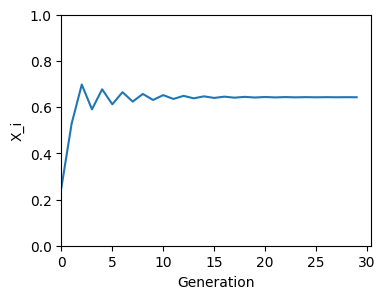


last value of x: 0.6427


In [10]:
lgs=Logistic()
lgs.plot(k=k_val, ret=True)

The same is true for $k=2.9$:

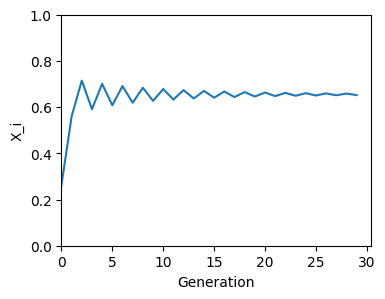


last value of x: 0.6520


In [11]:
lgs.plot(k=2.9, ret=True)

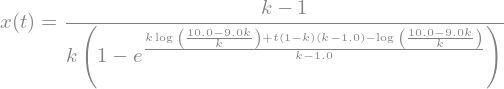

Limit value for x: 0.6552


In [12]:
x_tp=logistic(x_ini, 2.9)
x_limit=x_tp.limit(t, sym.oo).evalf()
print("Limit value for x: %6.4f" % x_limit)

For lower values of $k$, the equilibrium state is quickly reached and the agreement with analytical case is perfect: 

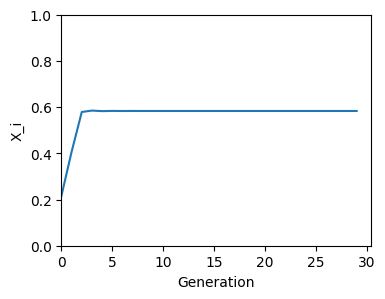


last value of x: 0.5833


In [13]:
lgs.plot(k=2.4, ret=True)

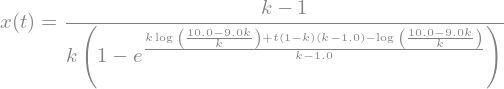

Limit value for x: 0.5833


In [14]:
x_tp=logistic(x_ini, 2.4)
x_limit=x_tp.limit(t, sym.oo).evalf()
print("Limit value for x: %6.4f" % x_limit)

However, for values of $k$ larger than about 3, we observe different behaviours.

#### Numerical case: 

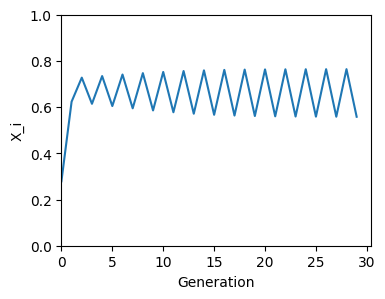

Set of stable points:  {0.76457, 0.55801}


In [15]:
lgs.plot(k=3.1)
p_set=lgs.get_stable_points_set(k=3.1)
print("Set of stable points: ", p_set)

#### Analytic case

The population reaches a stable equilibrium:

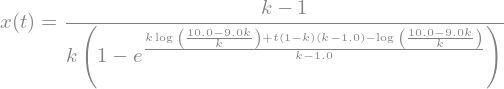

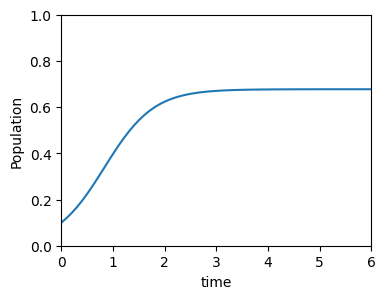

Limit value for x: 0.6774


In [16]:
x_tp=logistic(x_ini, 3.1)
plot_analytic()
x_limit=x_tp.limit(t, sym.oo).evalf()
print("Limit value for x: %6.4f" % x_limit)

Let's study the behaviour for $\Delta t=1$ as a function of $k$: 

In [17]:
def plot(kmin, kmax, npoints=100):
    
    k_list=np.linspace(kmin, kmax, npoints)
    
    plt.figure(figsize=(5,4))
    
    for ik in k_list:
        isx=lgs.get_stable_points_set(ik)
        isx_size=len(isx)
        ik_list=np.repeat(ik, isx_size)
        is_list=list(isx)
        plt.plot(ik_list, is_list, "k.", markersize=2)
    
    plt.xlim(kmin, kmax)
    plt.xlabel("K")
    plt.ylabel("X")
    plt.show()

As $k$ changes from 2.9 to 3.5, two *bifurcation* points can be observed:

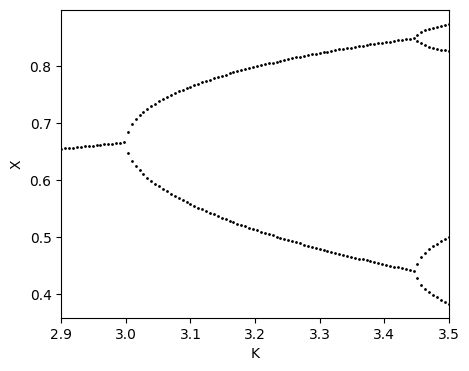

In [18]:
plot(2.9, 3.5)

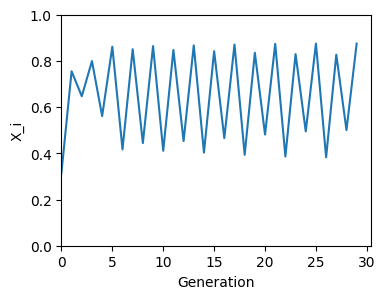

Set of stable points:  {0.50088, 0.875, 0.38282, 0.82694}


In [19]:
lgs.plot(k=3.5)
p_set=lgs.get_stable_points_set(k=3.5)
print("Set of stable points: ", p_set)

By increasing $k$ up to 4., a fractal behaviour arises:

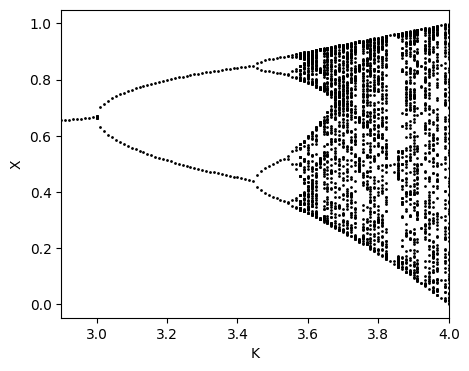

In [20]:
plot(2.9, 4.)

In [24]:
p_set=lgs.get_stable_points_set(k=3.55)
print("Set of stable points: ", p_set)

Set of stable points:  {0.50603, 0.88737, 0.81266, 0.3548, 0.54047, 0.88168, 0.37033, 0.82781}
